In [29]:
import numpy as np
import matplotlib.pyplot as plt

from os.path import join
import sys
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [30]:
#%matplotlib inline

In [31]:
sys.path.insert(0, '../src/')
from logger import Logger, ExperimentAnalyzer, plot_typography

In [32]:
plot_typography(usetex=False)

In [33]:
SAVE = False

In [34]:
analyzer = ExperimentAnalyzer("detumbling_ecef", decimate_step=4) # use decimate step of four to get seconds as the sampling time is 250ms

# Angular velocity

omega
\ensuremath{\omega}


(22.294726473630977, 9.247829237638115)

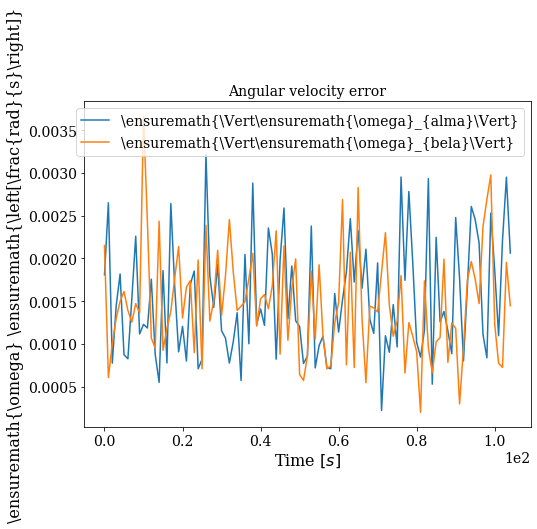

In [39]:
w_err = analyzer.plot(["omega"], start_idx=20, stop_idx=1000000, error=True, joint_plot=True,
                      plot_norm=True, save=SAVE, norm_only=False, multiplot=True, multiplot_idx=["alma", "bela"])
w_err_stable = np.rad2deg(np.linalg.norm(w_err, axis=1))
w_err_stable.mean()*360, w_err_stable.std()*360

### Compare groud truth and prediction 

omega
omega_pred
\ensuremath{\omega}
\ensuremath{\hat{\omega}}


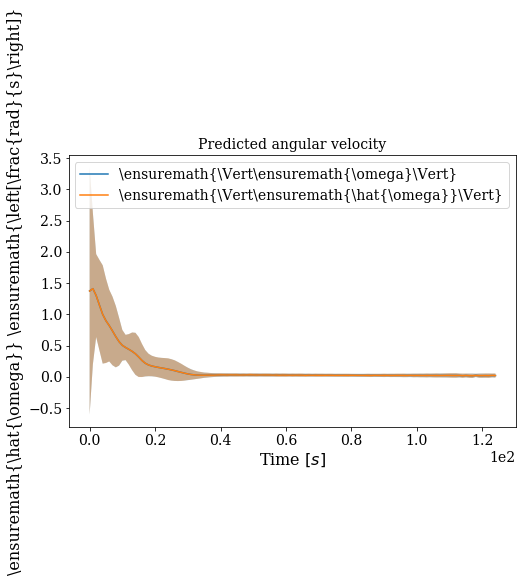

In [22]:
_ = analyzer.plot(["omega", "omega_pred"],start_idx=0, stop_idx=6000, joint_plot=True,
                  plot_norm=True, figsize=(8,5), save=SAVE, norm_only=True)

# Orientation

ads_error_angles
\ensuremath{Euler_{err}}


(9.853221192258218, 6.017828035032559)

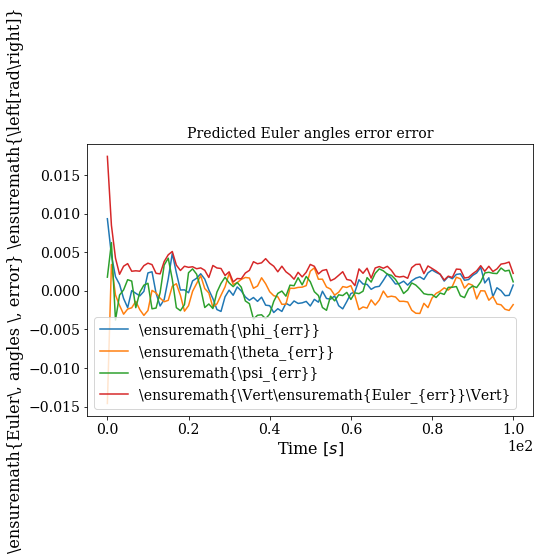

In [70]:
euler_err = analyzer.plot(["ads_error_angles"], start_idx=0, stop_idx = 1500000,error=True, std_factor=3, joint_plot=True,
                          plot_norm=True, figsize=(8,5), save=SAVE)
euler_err_stable = np.rad2deg(np.linalg.norm(euler_err, axis=1))
euler_err_stable.mean()*60, euler_err_stable.std()*60 #_ arc minute

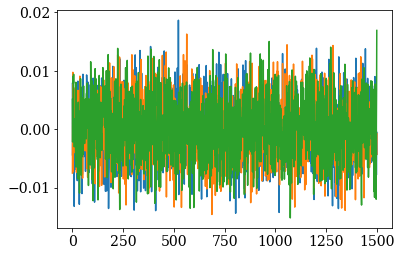

In [34]:
noise = 5e-3 *np.random.randn(3,1500)
plt.plot(noise.T)

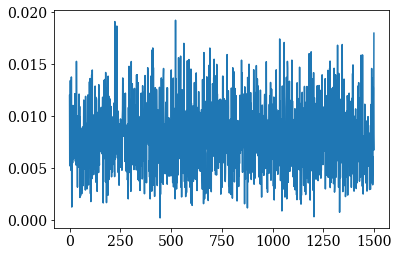

In [35]:
plt.plot(np.linalg.norm(noise.T, axis=1))

### Stability

angles
\ensuremath{Euler_{err}}


(-11.80995579005106, 18.867323211407673)

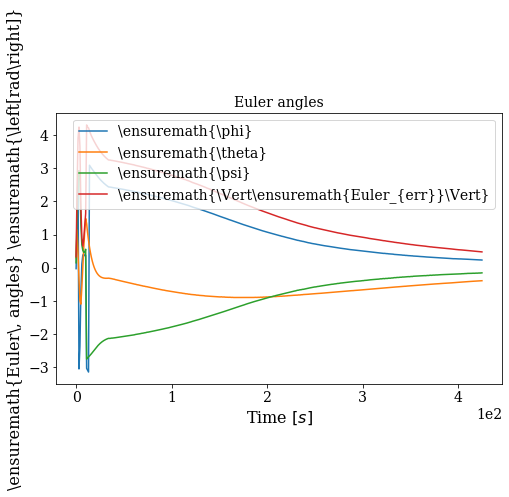

In [34]:
euler = analyzer.plot(["angles"], start_idx=1500, stop_idx = 150000,error=False, std_factor=3,
                      joint_plot=True, plot_norm=True, figsize=(8,5), save=SAVE)

# attitude stability
att_stability = np.diff(np.rad2deg(euler), axis=0).mean(axis=0)
att_stability.mean()*360, att_stability.std()*360

In [184]:
# uncertain scenario analyzer.plot(["angles"], start_idx=0, stop_idx = 150,error=True, std_factor=3, joint_plot=True, plot_norm=True, figsize=(8,5), save=True)

### Comparing to target attitude

angles_target


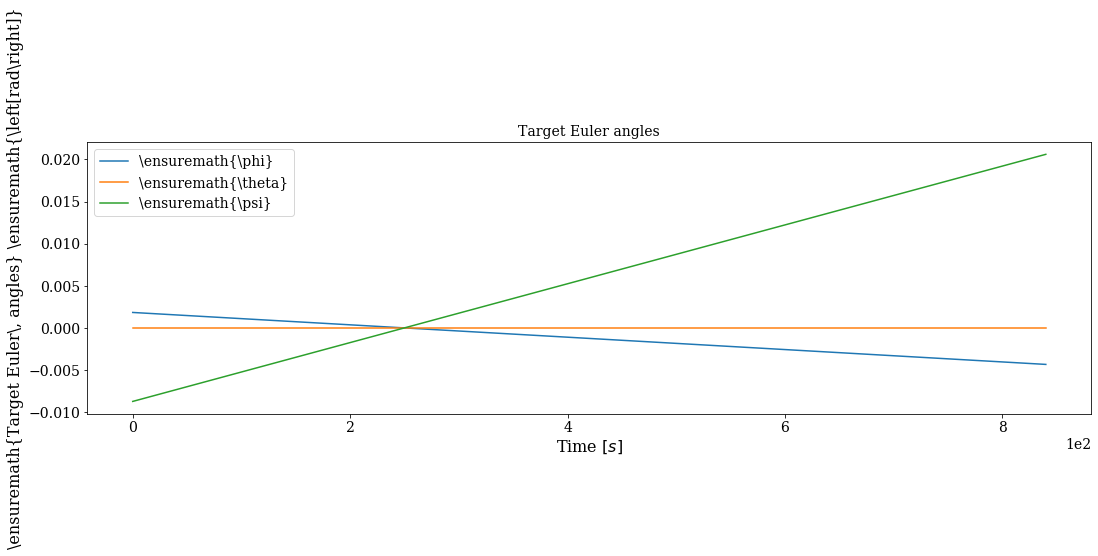

In [21]:
_ = analyzer.plot(["angles_target"], start_idx = 10, stop_idx = 1000000,joint_plot=True, error=False,
              plot_norm=False, figsize=(18,5), save=SAVE)

angles_target
angles


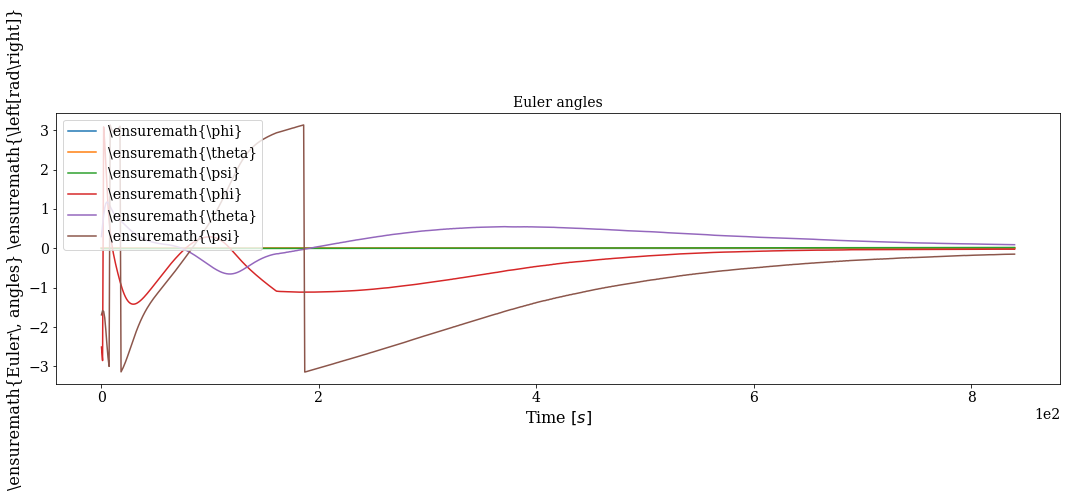

In [22]:
_ = analyzer.plot(["angles_target", "angles"], start_idx = 10, stop_idx = 1000000,joint_plot=True, error=False,
              plot_norm=False, figsize=(18,5), save=SAVE)

acs_error_angles
\ensuremath{Euler_{err}}


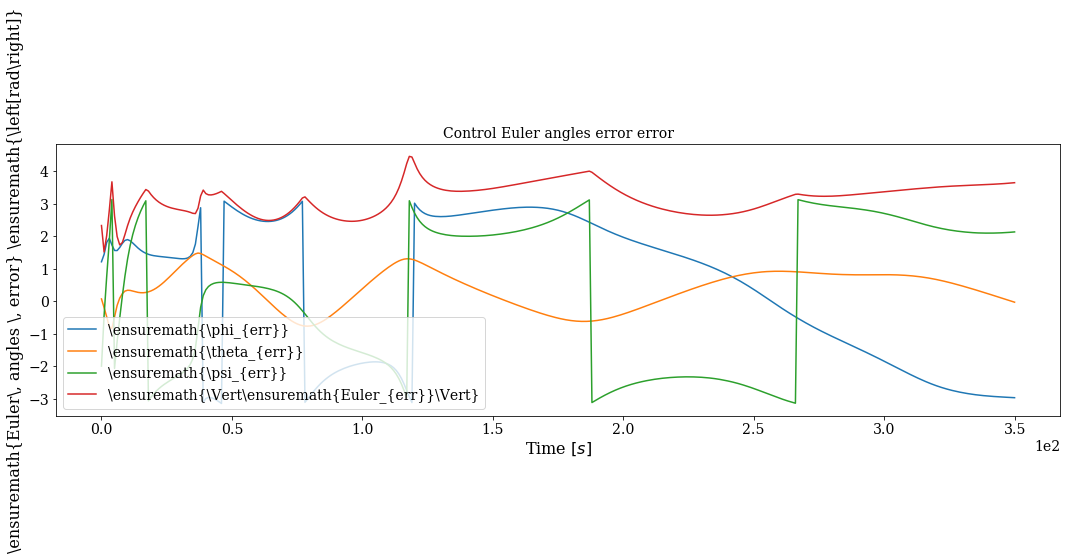

In [50]:
_ = analyzer.plot(["acs_error_angles"], start_idx = 0, stop_idx = 1000000,joint_plot=True, error=True,
              plot_norm=True, figsize=(18,5), save=SAVE)

### Compare ground truth, proposed method and QuAdSRUKF

angles
angles_pred
angles_ref_pred


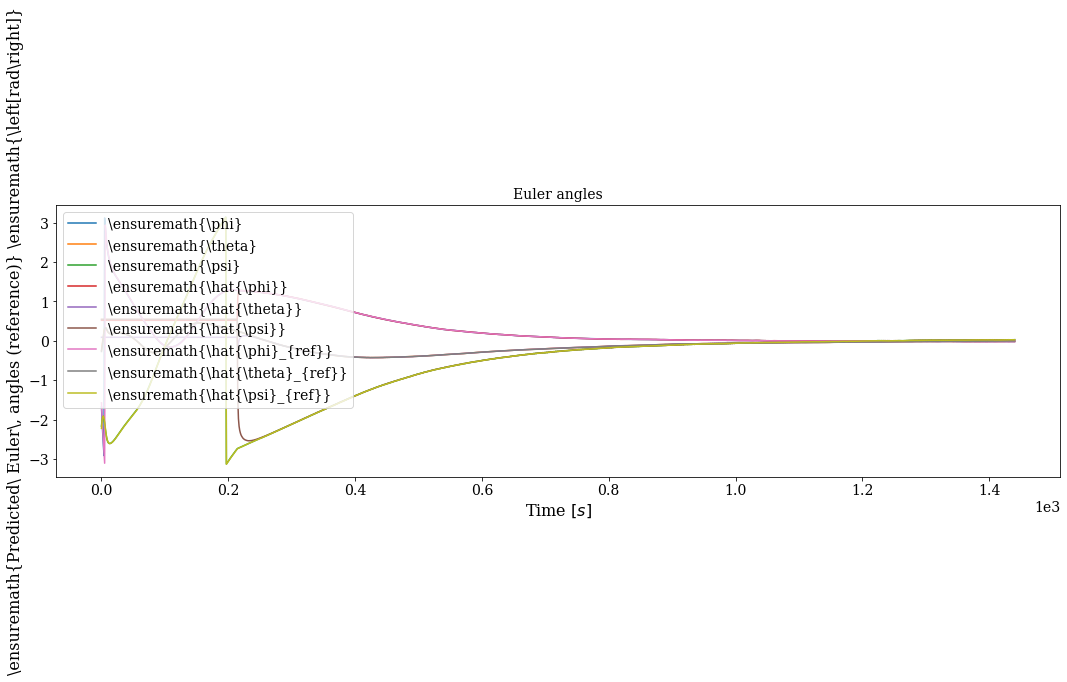

In [151]:
_ = analyzer.plot(["angles", "angles_pred", "angles_ref_pred"], start_idx = 10, stop_idx = 1000000,joint_plot=True, error=False,
              plot_norm=False, figsize=(18,5), save=SAVE)

ads_error_angles
ads_ref_error_angles


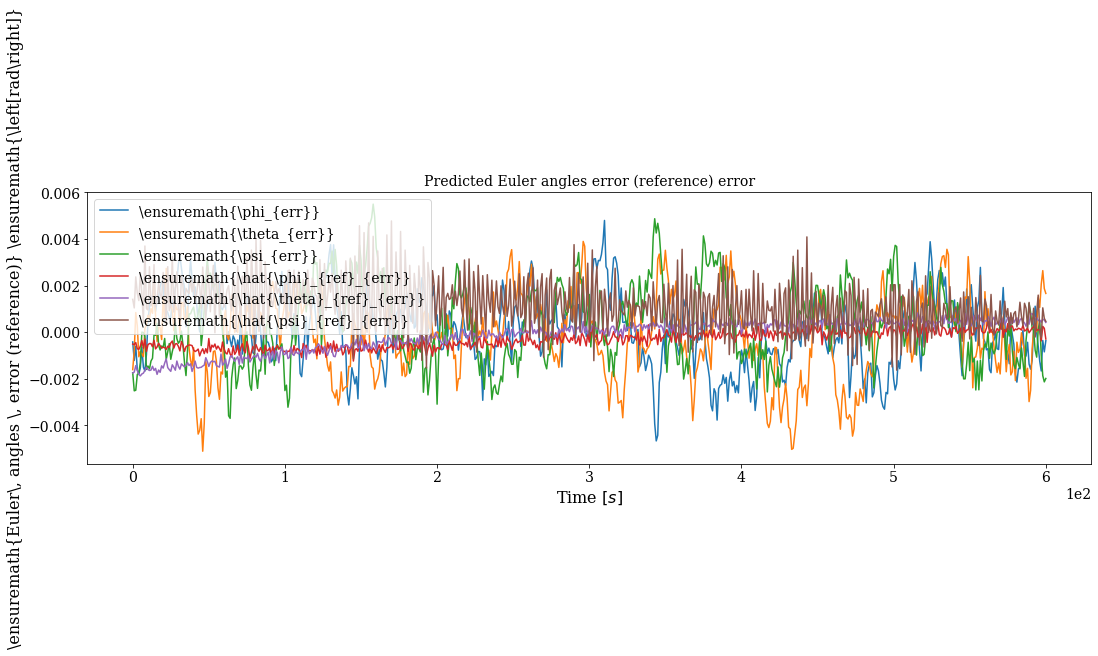

In [28]:
_ = analyzer.plot(["ads_error_angles", "ads_ref_error_angles"], start_idx = 250, stop_idx = 100000,joint_plot=True, error=True,
              plot_norm=False, figsize=(18,5), save=SAVE)

### Compare ground truth and prediction

angles
angles_pred


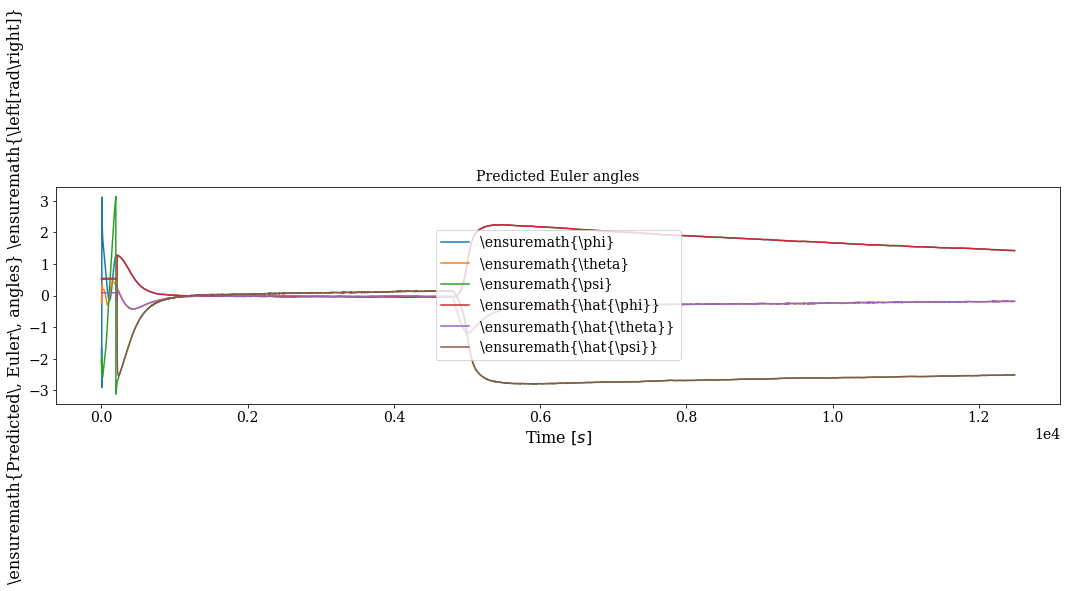

In [100]:
_ = analyzer.plot(["angles", "angles_pred"], start_idx = 10, stop_idx = 35000,joint_plot=True, plot_norm=False, figsize=(18,4))

# Actuator signals

h_rw
rw_torques
mtq_m
hybrid_torques
mtq_torques


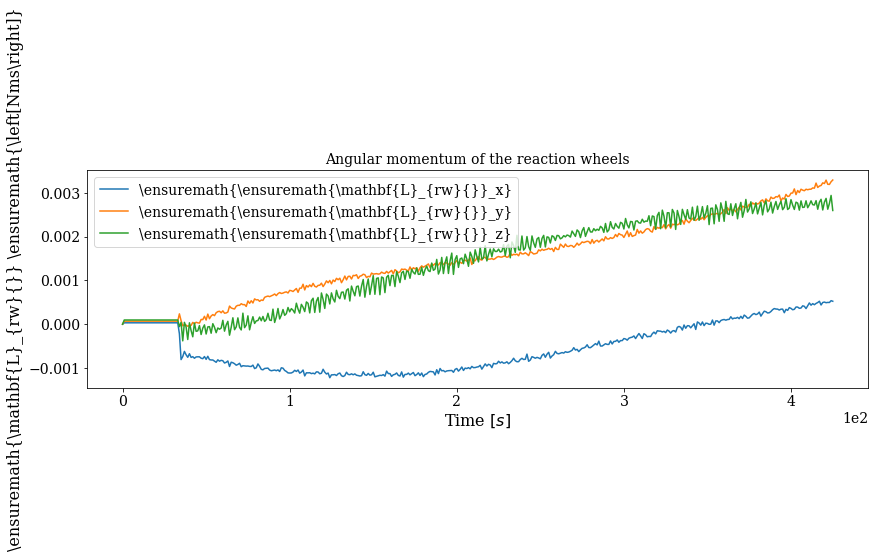

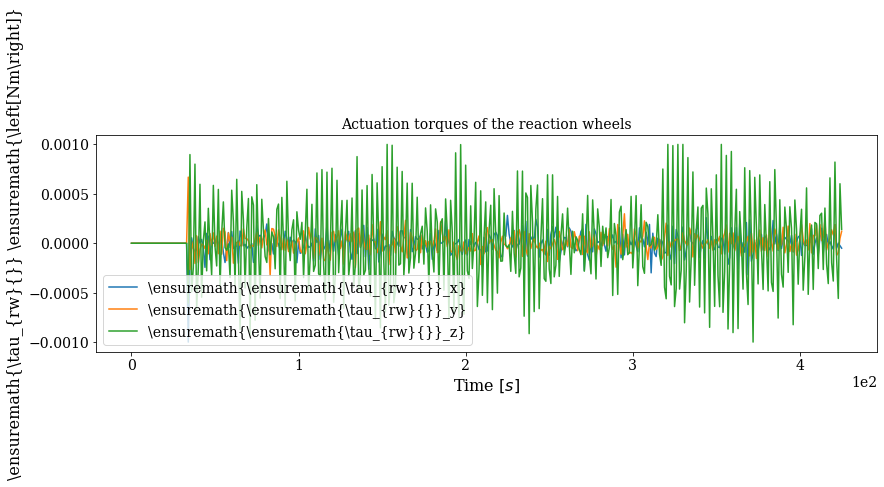

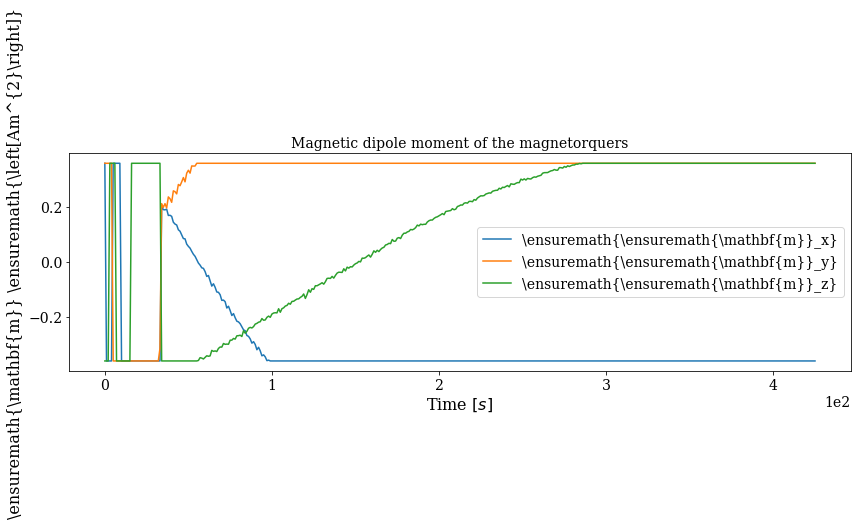

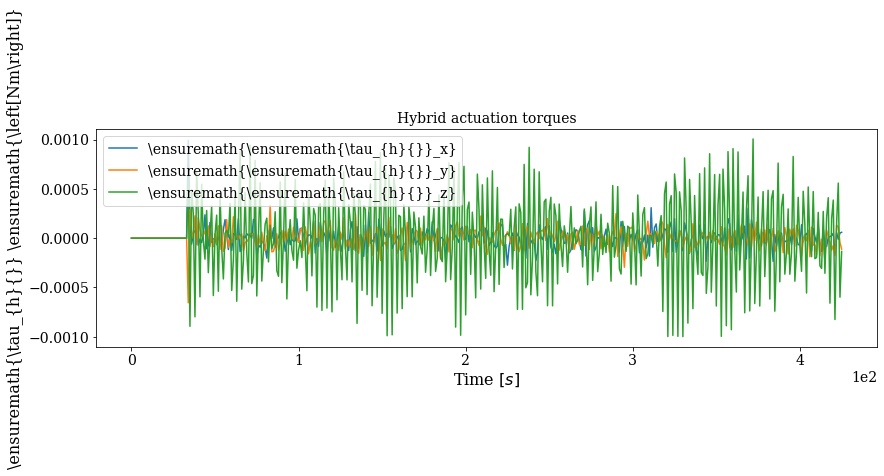

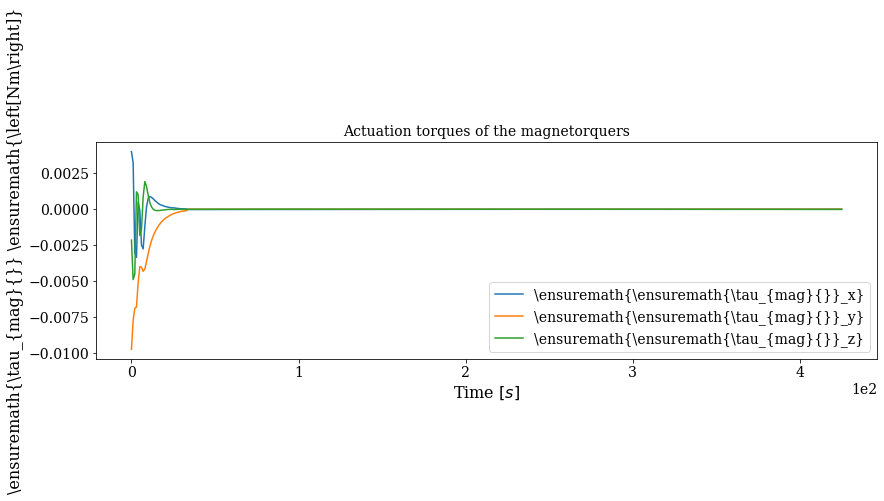

In [32]:
_ = analyzer.plot(["h_rw", "rw_torques", "mtq_m", "hybrid_torques", "mtq_torques"], start_idx=0, stop_idx=114500,joint_plot=False,
              plot_norm=False,figsize=(14,4), save=SAVE)

# Environment

### Magnetic field 

magnet


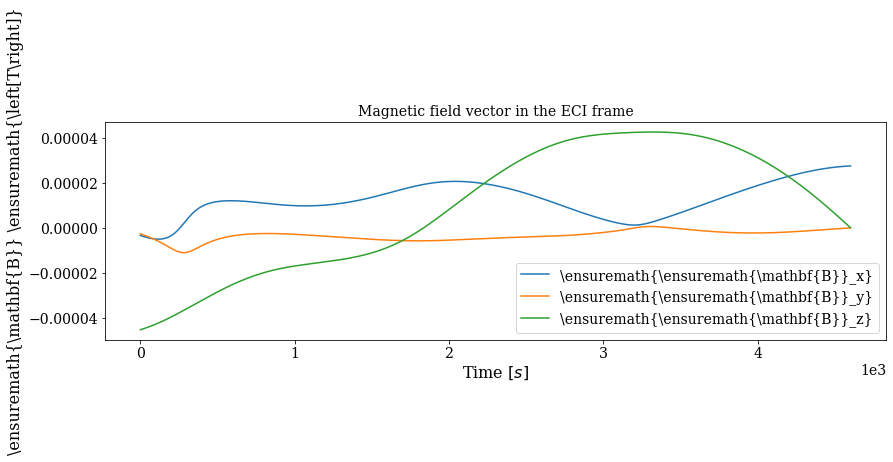

In [167]:
magnet = analyzer.plot(["magnet"], joint_plot=False, plot_norm=False, figsize=(14,4), save=SAVE)

magnet_abc


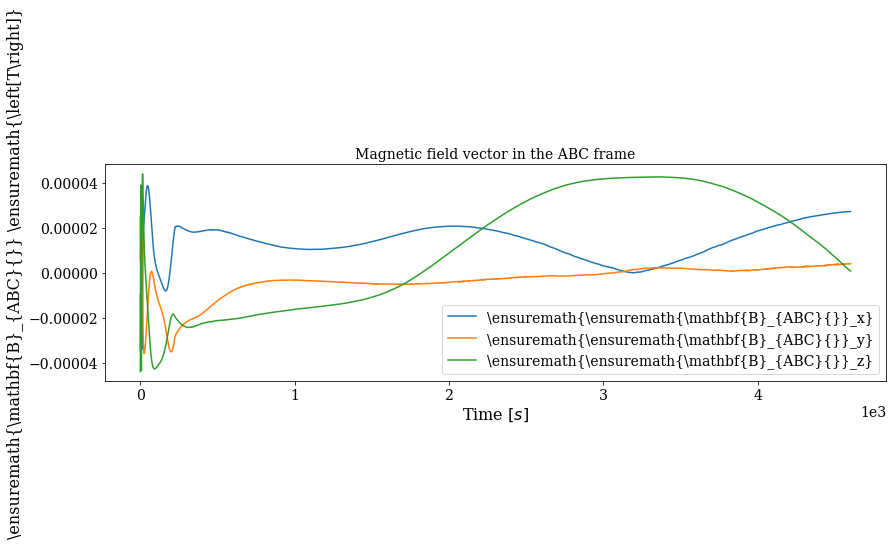

In [168]:
magnet_abc = analyzer.plot(["magnet_abc"], joint_plot=False, plot_norm=False, figsize=(14,4), save=SAVE)
magnet_abc_normalized = magnet_abc /np.linalg.norm(magnet_abc, axis=1).reshape(-1, 1)

### Sun vector 

sun


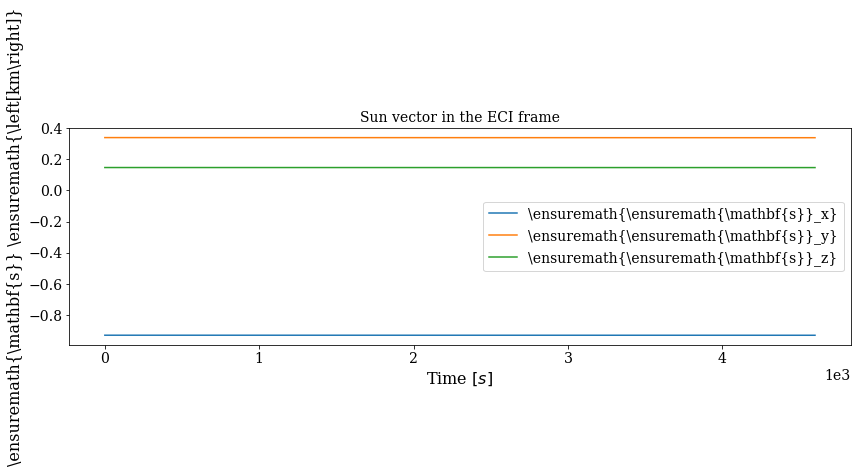

In [169]:
sun = analyzer.plot(["sun"], joint_plot=False, plot_norm=False, figsize=(14,4), save=SAVE)

sun_abc


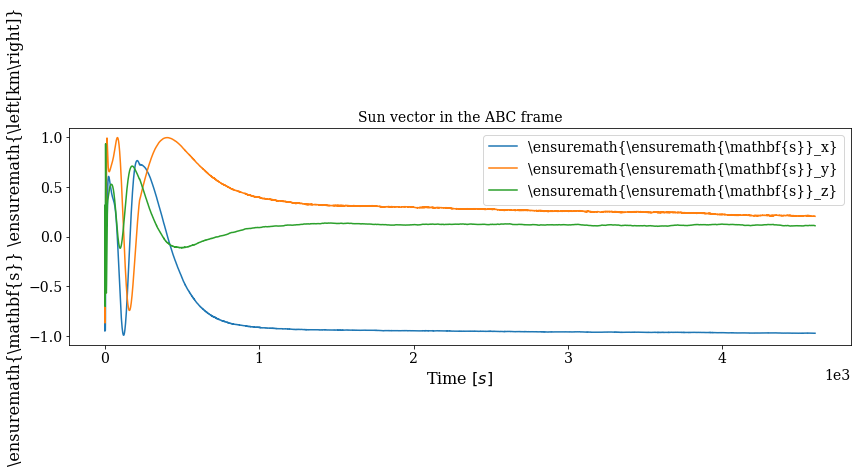

In [170]:
sun_abc = analyzer.plot(["sun_abc"], joint_plot=False, plot_norm=False, figsize=(14,4), save=SAVE)


### Parallelism check between Sun vector and magnetic field vector 

Text(0.5, 1.0, 'Inner product of the magnetic field and the sun vectors')

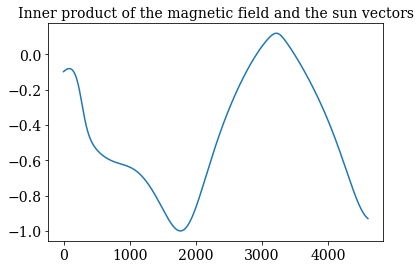

In [171]:
plt.plot((magnet_abc_normalized*sun_abc).sum(axis=1))
plt.title("Inner product of the magnetic field and the sun vectors")

### Disturbance torques

dist_torques


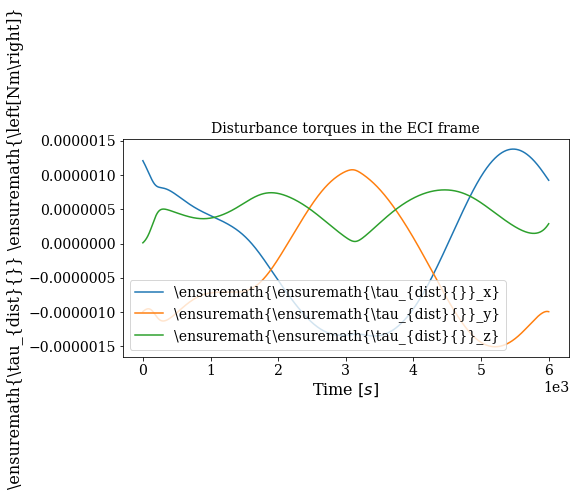

In [503]:
dist_torques = analyzer.plot(["dist_torques"], stop_idx=6000, joint_plot=False, plot_norm=False, figsize=(8,4), save=SAVE)

# Diebold-Mariano Test

In [63]:
# Author   : John Tsang
# Date     : December 7th, 2017
# Purpose  : Implement the Diebold-Mariano Test (DM test) to compare 
#            forecast accuracy
# Input    : 1) actual_lst: the list of actual values
#            2) pred1_lst : the first list of predicted values
#            3) pred2_lst : the second list of predicted values
#            4) h         : the number of stpes ahead
#            5) crit      : a string specifying the criterion 
#                             i)  MSE : the mean squared error
#                            ii)  MAD : the mean absolute deviation
#                           iii) MAPE : the mean absolute percentage error
#                            iv) poly : use power function to weigh the errors
#            6) poly      : the power for crit power 
#                           (it is only meaningful when crit is "poly")
# Condition: 1) length of actual_lst, pred1_lst and pred2_lst is equal
#            2) h must be an integer and it must be greater than 0 and less than 
#               the length of actual_lst.
#            3) crit must take the 4 values specified in Input
#            4) Each value of actual_lst, pred1_lst and pred2_lst must
#               be numerical values. Missing values will not be accepted.
#            5) power must be a numerical value.
# Return   : a named-tuple of 2 elements
#            1) p_value : the p-value of the DM test
#            2) DM      : the test statistics of the DM test
##########################################################
# References:
#
# Harvey, D., Leybourne, S., & Newbold, P. (1997). Testing the equality of 
#   prediction mean squared errors. International Journal of forecasting, 
#   13(2), 281-291.
#
# Diebold, F. X. and Mariano, R. S. (1995), Comparing predictive accuracy, 
#   Journal of business & economic statistics 13(3), 253-264.
#
##########################################################
def dm_test(actual_lst, pred1_lst, pred2_lst, h = 1, crit="MSE", power = 2):
    # Routine for checking errors
    def error_check():
        rt = 0
        msg = ""
        # Check if h is an integer
        if (not isinstance(h, int)):
            rt = -1
            msg = "The type of the number of steps ahead (h) is not an integer."
            return (rt,msg)
        # Check the range of h
        if (h < 1):
            rt = -1
            msg = "The number of steps ahead (h) is not large enough."
            return (rt,msg)
        len_act = len(actual_lst)
        len_p1  = len(pred1_lst)
        len_p2  = len(pred2_lst)
        # Check if lengths of actual values and predicted values are equal
        if (len_act != len_p1 or len_p1 != len_p2 or len_act != len_p2):
            rt = -1
            msg = "Lengths of actual_lst, pred1_lst and pred2_lst do not match."
            return (rt,msg)
        # Check range of h
        if (h >= len_act):
            rt = -1
            msg = "The number of steps ahead is too large."
            return (rt,msg)
        # Check if criterion supported
        if (crit != "MSE" and crit != "MAPE" and crit != "MAD" and crit != "poly"):
            rt = -1
            msg = "The criterion is not supported."
            return (rt,msg)  
        # Check if every value of the input lists are numerical values
        from re import compile as re_compile
        comp = re_compile("^\d+?\.\d+?$")  
        def compiled_regex(s):
            """ Returns True is string is a number. """
            if comp.match(s) is None:
                return s.isdigit()
            return True
        for actual, pred1, pred2 in zip(actual_lst, pred1_lst, pred2_lst):
            is_actual_ok = compiled_regex(str(abs(actual)))
            is_pred1_ok = compiled_regex(str(abs(pred1)))
            is_pred2_ok = compiled_regex(str(abs(pred2)))
            if (not (is_actual_ok and is_pred1_ok and is_pred2_ok)):  
                msg = "An element in the actual_lst, pred1_lst or pred2_lst is not numeric."
                rt = -1
                return (rt,msg)
        return (rt,msg)
    
    # Error check
    error_code = error_check()
    # Raise error if cannot pass error check
    if (error_code[0] == -1):
        raise SyntaxError(error_code[1])
        return
    # Import libraries
    from scipy.stats import t
    import collections
    import pandas as pd
    import numpy as np
    
    # Initialise lists
    e1_lst = []
    e2_lst = []
    d_lst  = []
    
    # convert every value of the lists into real values
    actual_lst = pd.Series(actual_lst).apply(lambda x: float(x)).tolist()
    pred1_lst = pd.Series(pred1_lst).apply(lambda x: float(x)).tolist()
    pred2_lst = pd.Series(pred2_lst).apply(lambda x: float(x)).tolist()
    
    # Length of lists (as real numbers)
    T = float(len(actual_lst))
    
    # construct d according to crit
    if (crit == "MSE"):
        for actual,p1,p2 in zip(actual_lst,pred1_lst,pred2_lst):
            e1_lst.append((actual - p1)**2)
            e2_lst.append((actual - p2)**2)
        for e1, e2 in zip(e1_lst, e2_lst):
            d_lst.append(e1 - e2)
    elif (crit == "MAD"):
        for actual,p1,p2 in zip(actual_lst,pred1_lst,pred2_lst):
            e1_lst.append(abs(actual - p1))
            e2_lst.append(abs(actual - p2))
        for e1, e2 in zip(e1_lst, e2_lst):
            d_lst.append(e1 - e2)
    elif (crit == "MAPE"):
        for actual,p1,p2 in zip(actual_lst,pred1_lst,pred2_lst):
            e1_lst.append(abs((actual - p1)/actual))
            e2_lst.append(abs((actual - p2)/actual))
        for e1, e2 in zip(e1_lst, e2_lst):
            d_lst.append(e1 - e2)
    elif (crit == "poly"):
        for actual,p1,p2 in zip(actual_lst,pred1_lst,pred2_lst):
            e1_lst.append(((actual - p1))**(power))
            e2_lst.append(((actual - p2))**(power))
        for e1, e2 in zip(e1_lst, e2_lst):
            d_lst.append(e1 - e2)    
    
    # Mean of d        
    mean_d = pd.Series(d_lst).mean()
    
    # Find autocovariance and construct DM test statistics
    def autocovariance(Xi, N, k, Xs):
        autoCov = 0
        T = float(N)
        for i in np.arange(0, N-k):
              autoCov += ((Xi[i+k])-Xs)*(Xi[i]-Xs)
        return (1/(T))*autoCov
    gamma = []
    for lag in range(0,h):
        gamma.append(autocovariance(d_lst,len(d_lst),lag,mean_d)) # 0, 1, 2
    V_d = (gamma[0] + 2*sum(gamma[1:]))/T
    DM_stat=V_d**(-0.5)*mean_d
    harvey_adj=((T+1-2*h+h*(h-1)/T)/T)**(0.5)
    DM_stat = harvey_adj*DM_stat
    # Find p-value
    p_value = 2*t.cdf(-abs(DM_stat), df = T - 1)
    
    # Construct named tuple for return
    dm_return = collections.namedtuple('dm_return', 'DM p_value')
    
    rt = dm_return(DM = DM_stat, p_value = p_value)
    
    return rt

angles


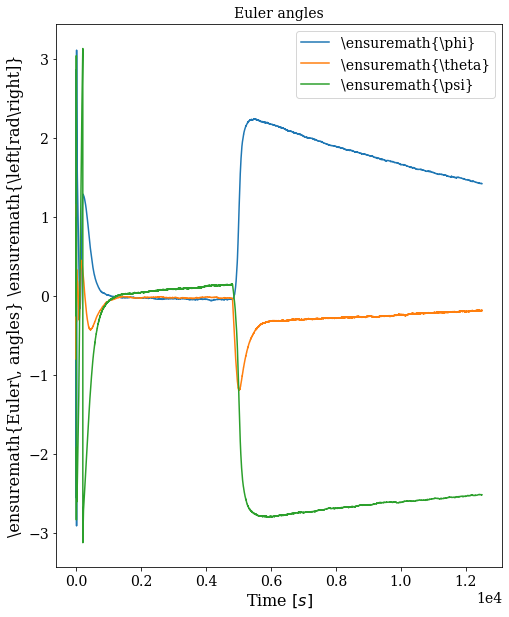

In [101]:
ref = analyzer.plot(["angles"], start_idx = 0, stop_idx = 1000000,joint_plot=True, error=False,
              plot_norm=False, figsize=(8,10), save=SAVE)

angles_pred


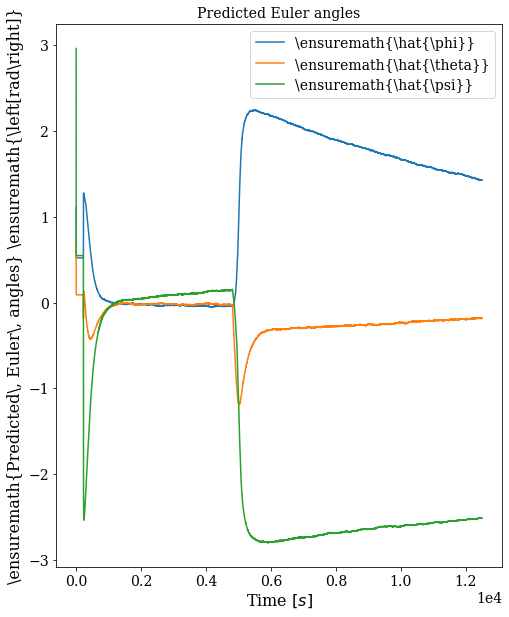

In [102]:
proposed = analyzer.plot(["angles_pred"], start_idx = 0, stop_idx = 1000000,joint_plot=True, error=False,
              plot_norm=False, figsize=(8,10), save=SAVE)

angles_ref_pred


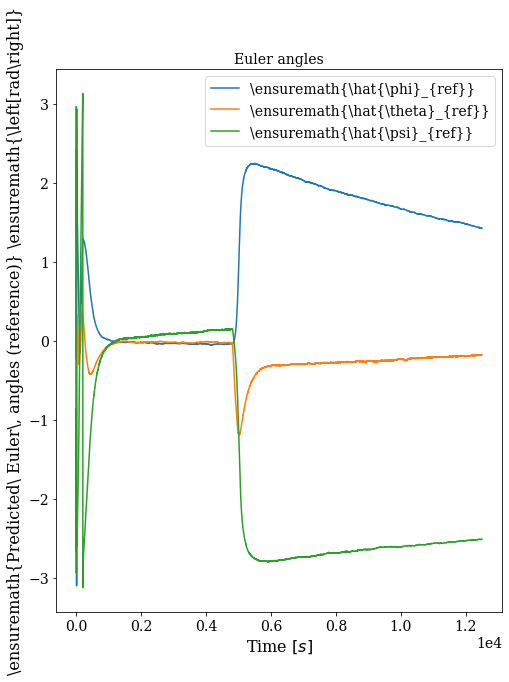

In [103]:
ref_pred = analyzer.plot(["angles_ref_pred"], start_idx = 0, stop_idx = 1000000,joint_plot=True, error=False,
              plot_norm=False, figsize=(8,10), save=SAVE)

In [104]:
ref.shape

(12500, 3)

In [105]:
dm_test(ref[:,0],proposed[:,0],ref_pred[:,0],h = 1, crit="MSE")

SyntaxError: An element in the actual_lst, pred1_lst or pred2_lst is not numeric. (<string>)

In [106]:
dm_test(ref[:,1],proposed[:,1],ref_pred[:,1],h = 1, crit="MSE")

dm_return(DM=8.593936868914321, p_value=9.396153272065981e-18)

In [107]:
dm_test(ref[:,2],proposed[:,2],ref_pred[:,2],h = 1, crit="MSE")

SyntaxError: An element in the actual_lst, pred1_lst or pred2_lst is not numeric. (<string>)

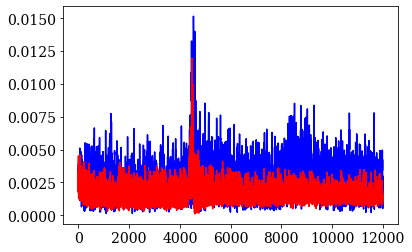

In [118]:
start_idx = 500
end_idx = 100000000
plt.plot(np.linalg.norm(proposed-ref, axis=1)[start_idx:end_idx], "b-")
plt.plot(np.linalg.norm(ref_pred-ref, axis=1)[start_idx:end_idx], "r-")

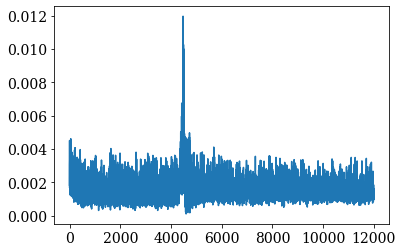

In [119]:
plt.plot(np.linalg.norm(ref_pred-ref, axis=1)[start_idx:])

In [120]:
f"{np.linalg.norm(proposed-ref, axis=1)[start_idx:end_idx].mean()*60*60} arcseconds mean error"

'10.377456881258906 arcseconds mean error'

In [121]:
f"{np.linalg.norm(ref_pred-ref, axis=1)[start_idx:end_idx].mean()*60*60} arcseconds mean error difference"

'5.5978676817962345 arcseconds mean error difference'

In [122]:
f"proposed mean err={(proposed-ref).mean(axis=0)}, reference mean err {(ref_pred-ref).mean(axis=0)}"

'proposed mean err=[-0.00180244 -0.0011783   0.01590727], reference mean err [-2.40804914e-04 -8.97344057e-05 -8.50286018e-04]'